Data taken from: https://zenodo.org/record/6320338/files/Training_Data.zip?download=1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zlib

In [2]:
data=pd.read_json('Training_Data/training.json', encoding='utf-8-sig')

In [3]:
data.shape

(14, 813162)

In [4]:
data.sample(1)

,5127,5130,5248,5319,5338,11107,11147,11153,11158,11164,...,10380948,10380949,1038095,10380950,10380969,10380973,10380974,10380975,10380976,10380996
blocked,"[1, 1]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[0, 1]","[1, 0]","[0, 1]",...,"[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[1, 0]"


In [5]:
pixel=data.transpose()
pixel.head(10)

,visit_id,request_id,url,first_party_domain,label,triggering_origin,headers,img_format,img_size,img_mode,img_colour,matched,moved,blocked
5127,5,127,http://googleads.g.doubleclick.net/pagead/view...,http://www.b-travel.com/,3,http://www.b-travel.com,"[[""Host"",""googleads.g.doubleclick.net""],[""User...",GIF,"[1, 1]",P,"[0, 0, 0, 0]",1,0,"[1, 1]"
5130,5,130,http://www.google-analytics.com/collect?v=1&_v...,http://www.b-travel.com/,2,http://www.b-travel.com,"[[""Host"",""www.google-analytics.com""],[""User-Ag...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[1, 0]"
5248,5,248,https://www.facebook.com/tr/?id=26283382541559...,http://www.b-travel.com/,3,http://www.b-travel.com,"[[""Host"",""www.facebook.com""],[""User-Agent"",""Mo...",GIF,"[1, 1]",P,"[0, 0, 0, 0]",1,0,"[1, 0]"
5319,5,319,https://www.facebook.com/tr/?id=26283382541559...,http://www.b-travel.com/,3,http://www.b-travel.com,"[[""Host"",""www.facebook.com""],[""User-Agent"",""Mo...",GIF,"[1, 1]",P,"[0, 0, 0, 0]",1,0,"[1, 0]"
5338,5,338,https://www.google-analytics.com/collect?v=1&_...,http://www.b-travel.com/,2,http://www.b-travel.com,"[[""Host"",""www.google-analytics.com""],[""User-Ag...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[1, 0]"
11107,11,107,https://cms.quantserve.com/dpixel?a=p-n5vvLvRd...,http://www.zeno.org/,3,https://pagead2.googlesyndication.com,"[[""Host"",""cms.quantserve.com""],[""User-Agent"",""...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[1, 0]"
11147,11,147,https://cms.quantserve.com/dpixel?a=p-n5vvLvRd...,http://www.zeno.org/,3,https://pagead2.googlesyndication.com,"[[""Host"",""cms.quantserve.com""],[""User-Agent"",""...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[1, 0]"
11153,11,153,https://ag.innovid.com/trk?tid=11711&google_gi...,http://www.zeno.org/,3,https://pagead2.googlesyndication.com,"[[""Host"",""ag.innovid.com""],[""User-Agent"",""Mozi...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[0, 1]"
11158,11,158,https://cms.quantserve.com/dpixel?a=p-n5vvLvRd...,http://www.zeno.org/,3,https://pagead2.googlesyndication.com,"[[""Host"",""cms.quantserve.com""],[""User-Agent"",""...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[1, 0]"
11164,11,164,https://ag.innovid.com/trk?tid=11711&google_gi...,http://www.zeno.org/,3,https://pagead2.googlesyndication.com,"[[""Host"",""ag.innovid.com""],[""User-Agent"",""Mozi...",GIF,"[1, 1]",P,"[255, 255, 255, 255]",1,0,"[0, 1]"


# Exploratory Data Analysis

In [6]:
pixel.columns

Index(['visit_id', 'request_id', 'url', 'first_party_domain', 'label',
       'triggering_origin', 'headers', 'img_format', 'img_size', 'img_mode',
       'img_colour', 'matched', 'moved', 'blocked'],
      dtype='object')

In [7]:
pixel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813162 entries, 5127 to 10380996
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   visit_id            813162 non-null  object
 1   request_id          813162 non-null  object
 2   url                 813162 non-null  object
 3   first_party_domain  813162 non-null  object
 4   label               813162 non-null  object
 5   triggering_origin   813162 non-null  object
 6   headers             813162 non-null  object
 7   img_format          813162 non-null  object
 8   img_size            813162 non-null  object
 9   img_mode            813162 non-null  object
 10  img_colour          813162 non-null  object
 11  matched             813162 non-null  object
 12  moved               813162 non-null  object
 13  blocked             813162 non-null  object
dtypes: object(14)
memory usage: 125.3+ MB


### Missing Values

In [8]:
pixel.isnull().sum()

visit_id              0
request_id            0
url                   0
first_party_domain    0
label                 0
triggering_origin     0
headers               0
img_format            0
img_size              0
img_mode              0
img_colour            0
matched               0
moved                 0
blocked               0
dtype: int64

### Summary Statistics

In [9]:
type(pixel)

pandas.core.frame.DataFrame

In [10]:
pixel['label'].unique()   #etiket verisi

array([3, 2, 0, 1], dtype=object)

visualize the class imbalance in the 'label' column

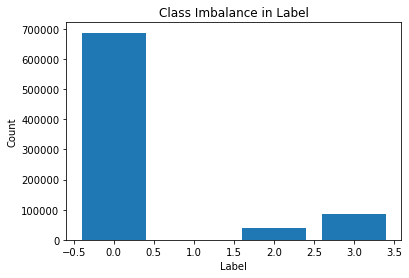

In [11]:
# Count the occurrences of each label
label_counts = pixel['label'].value_counts()

# Create a bar plot to visualize class imbalance
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Imbalance in Label')

# Display the plot
plt.show()


In [12]:
label_counts=pixel['label'].value_counts()
label_counts

0    687288
3     85976
2     39790
1       108
Name: label, dtype: int64

In [13]:
# Count the occurrences of each img_format
img_format_counts = pixel['img_format'].value_counts()
img_format_counts

PNG     251940
GIF     242640
JPEG    241161
WEBP     53888
ICO      22699
CUR        694
BMP         90
MPO         47
TIFF         3
Name: img_format, dtype: int64

Distribution of label column

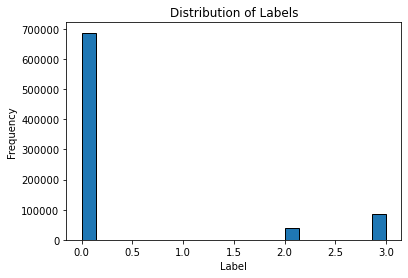

In [14]:
# Plotting the histogram
plt.hist(pixel['label'], bins='auto', edgecolor='black')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')

# Display the plot
plt.show()

Relationship between Label and Blocked

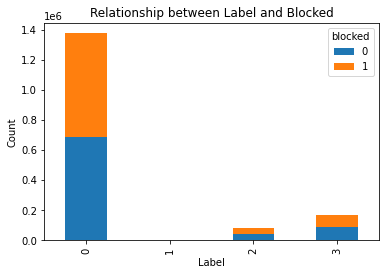

In [15]:
# Create a new dataframe with 'label' and 'blocked' columns
pixel_plot = pixel[['label', 'blocked']].copy()

# Explode the 'blocked' column to create separate columns for each value in the list
pixel_plot = pixel_plot.explode('blocked')

# Group the data by 'label' and 'blocked' and count the occurrences
pixel_plot = pixel_plot.groupby(['label', 'blocked']).size().unstack()

# Plot the stacked bar plot
pixel_plot.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Relationship between Label and Blocked')

# Display the plot
plt.show()


Correlation Matrix

In [16]:
# Convert img_size column from list-type to separate columns
pixel['img_size_width'] = pixel['img_size'].apply(lambda x: x[0])
pixel['img_size_height'] = pixel['img_size'].apply(lambda x: x[1])

# Select the relevant numeric columns
numeric_columns = ['visit_id', 'request_id', 'label', 'img_size_width', 'img_size_height']

# Compute the correlation matrix
correlation_matrix = pixel[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                 img_size_width  img_size_height
img_size_width         1.000000         0.809367
img_size_height        0.809367         1.000000


Bar plot showing the distribution of different values in categorical variables

In [17]:

# Select the categorical variables
#categorical_columns = ['first_party_domain', 'triggering_origin', 'img_format', 'img_mode', 'blocked']

# Loop through each categorical variable and create bar plots
#for column in categorical_columns:
#    plt.figure(figsize=(10, 6))
#    sns.countplot(data=pixel, x=column)
#    plt.xlabel(column)
#    plt.ylabel('Count')
#    plt.title(f'Distribution of {column}')
#    plt.xticks(rotation=45)
#    plt.show()

Box plot to identify outliers in numeric variables

In [18]:
# Select the numeric columns for which you want to create box plots
#numeric_columns = ['label', 'request_id', 'img_size_width', 'img_size_height']

# Create box plots for each numeric column
#for column in numeric_columns:
#    plt.figure(figsize=(8, 6))
#    sns.boxplot(data=pixel, y=column)
#    plt.ylabel(column)
#    plt.title(f'Box Plot of {column}')
#    plt.show()

In [19]:
# Drop columns that are not needed
columns_to_drop = ['visit_id', 'request_id', 'blocked', 'moved']
print(pixel.head())

     visit_id request_id                                                url  \
5127        5        127  http://googleads.g.doubleclick.net/pagead/view...   
5130        5        130  http://www.google-analytics.com/collect?v=1&_v...   
5248        5        248  https://www.facebook.com/tr/?id=26283382541559...   
5319        5        319  https://www.facebook.com/tr/?id=26283382541559...   
5338        5        338  https://www.google-analytics.com/collect?v=1&_...   

            first_party_domain label        triggering_origin  \
5127  http://www.b-travel.com/     3  http://www.b-travel.com   
5130  http://www.b-travel.com/     2  http://www.b-travel.com   
5248  http://www.b-travel.com/     3  http://www.b-travel.com   
5319  http://www.b-travel.com/     3  http://www.b-travel.com   
5338  http://www.b-travel.com/     2  http://www.b-travel.com   

                                                headers img_format img_size  \
5127  [["Host","googleads.g.doubleclick.net"],["User...

# Feature Engineering

### Top Netlocs

In [20]:
from urllib.parse import urlparse, parse_qs


# Extract netloc, query parameter, and path pieces from the 'url' column
pixel['netloc'] = pixel['url'].apply(lambda x: urlparse(x).netloc)
pixel['query_params'] = pixel['url'].apply(lambda x: parse_qs(urlparse(x).query))
pixel['path_pieces'] = pixel['url'].apply(lambda x: urlparse(x).path.split('/'))

# Display the updated dataset
print(pixel.head())

     visit_id request_id                                                url  \
5127        5        127  http://googleads.g.doubleclick.net/pagead/view...   
5130        5        130  http://www.google-analytics.com/collect?v=1&_v...   
5248        5        248  https://www.facebook.com/tr/?id=26283382541559...   
5319        5        319  https://www.facebook.com/tr/?id=26283382541559...   
5338        5        338  https://www.google-analytics.com/collect?v=1&_...   

            first_party_domain label        triggering_origin  \
5127  http://www.b-travel.com/     3  http://www.b-travel.com   
5130  http://www.b-travel.com/     2  http://www.b-travel.com   
5248  http://www.b-travel.com/     3  http://www.b-travel.com   
5319  http://www.b-travel.com/     3  http://www.b-travel.com   
5338  http://www.b-travel.com/     2  http://www.b-travel.com   

                                                headers img_format img_size  \
5127  [["Host","googleads.g.doubleclick.net"],["User...

One-hot vector of the most common netlocs -size=500

In [21]:
from sklearn.preprocessing import OneHotEncoder


In [22]:
# Extract the netloc from the 'url' column
pixel['netloc'] = pixel['url'].apply(lambda x: x.split('/')[2])
pixel['netloc']

5127                  googleads.g.doubleclick.net
5130                     www.google-analytics.com
5248                             www.facebook.com
5319                             www.facebook.com
5338                     www.google-analytics.com
                            ...                  
10380973                     adservice.google.com
10380974                     adservice.google.com
10380975                           www.google.com
10380976                            www.google.nl
10380996    267425845561726.webpush.freshchat.com
Name: netloc, Length: 813162, dtype: object

In [23]:
#import sklearn one-hot encoder
from sklearn.preprocessing import OneHotEncoder



## Extract netloc from URL using strip '/'
pixel['netloc'] = pixel['url'].apply(lambda x: x.split('/')[2])

# Get the top 500 netlocs
top_netlocs = pixel['netloc'].value_counts().head(500).index.tolist()

# Replace netlocs not in top 500 with 'OOV'
pixel.loc[~pixel['netloc'].isin(top_netlocs), 'netloc'] = 'OOV'

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_netloc = encoder.fit_transform(pixel[['netloc']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_netloc.toarray(), columns=encoder.get_feature_names_out(['netloc']))
encoded_df
# Concatenate the original DataFrame with the encoded DataFrame
#pixel_encoded = pd.concat([pixel, encoded_df], axis=1)

# Drop the 'url' and 'netloc' columns
#pixel_encoded.drop(['url', 'netloc'], axis=1, inplace=True)

,netloc_133886.global.siteimproveanalytics.io,netloc_OOV,netloc_abcedu.online,netloc_abs.twimg.com,netloc_ad.360yield.com,netloc_ad.as.amanad.adtdp.com,netloc_ad.doubleclick.net,netloc_ad.tpmn.co.kr,netloc_adcombo.com,netloc_ade.googlesyndication.com,...,netloc_www.werkmax.de,netloc_www.wvnet.at,netloc_www.yorkshiretea.co.uk,netloc_www.zeitzeichen.net,netloc_www.zen-diamond.de,netloc_www.zenick.it,netloc_www.zm-online.de,netloc_x.bidswitch.net,netloc_yt3.ggpht.com,netloc_zilver.nl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top Query

Multiple-hot vector of the most common query parameters

In [24]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

query_params = pixel['query_params']
param_counts = {}
for params in query_params:
    for param in params.keys():
        if param in param_counts:
            param_counts[param] += 1
        else:
            param_counts[param] = 1

top_params = sorted(param_counts, key=param_counts.get, reverse=True)[:500]
oov_param = 'OOV'
pixel['query_params'] = pixel['query_params'].apply(lambda params: {param: param if param in top_params else oov_param for param in params.keys()})
# Flatten the modified query_params column into a list of dictionaries
modified_query_params = pixel['query_params'].tolist()

# Create a FeatureHasher object
hasher = FeatureHasher(n_features=500, input_type='dict')

# Transform the modified query_params list
hashed_query_params = hasher.transform(modified_query_params)

# Convert the hashed query parameters to a DataFrame
query_params_df = pd.DataFrame.sparse.from_spmatrix(hashed_query_params)

# Display the new DataFrame
print(query_params_df)




        0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
813157  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
813158  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
813159  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
813160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
813161  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        493  494  495  496  497  498  4

### Top Path Pieces

Multiple-hot vector of the most common word in the path

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
pixel['path'] = pixel['url'].str.split('/').str[3:].str.join('/')
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
word_counts = vectorizer.fit_transform(pixel['path'])
word_freq = word_counts.sum(axis=0)
top_words = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x: word_freq[0, x[1]], reverse=True)[:5]]
mlb = MultiLabelBinarizer()
multiple_hot_words = mlb.fit_transform(pixel['path'].str.findall('|'.join(top_words)))
path_df = pd.DataFrame(multiple_hot_words, columns=[f'word_{i+1}' for i in range(multiple_hot_words.shape[1])])
print(path_df)


        word_1  word_2  word_3  word_4  word_5
0            1       0       0       0       0
1            1       1       1       0       0
2            1       1       0       0       0
3            1       1       1       0       0
4            1       1       1       0       0
...        ...     ...     ...     ...     ...
813157       1       1       0       0       0
813158       1       1       0       0       0
813159       1       1       1       0       0
813160       1       1       1       0       0
813161       0       0       0       0       0

[813162 rows x 5 columns]


### URL Length

Number of characters in path and in query part of URL

In [26]:
# Calculate the number of characters in the path
pixel['path_length'] = pixel['url'].apply(lambda url: len(url.split('?')[0]))

# Calculate the number of characters in the query part
pixel['query_length'] = pixel['url'].apply(lambda url: len(url.split('?')[-1]) if '?' in url else 0)

# Display the resulting DataFrame with the added columns
print(pixel[['path_length', 'query_length']])

          path_length  query_length
5127               74            24
5130               39           262
5248               28           216
5319               28           369
5338               40           294
...               ...           ...
10380973          148             0
10380974          153             0
10380975           53           453
10380976           52           453
10380996           57             0

[813162 rows x 2 columns]


### Has Query

Binary indicator, true if the URL contains any query

In [27]:
# Create a binary indicator for query presence
pixel['query_indicator'] = pixel['url'].str.contains('\?')

# Display the resulting DataFrame with the added column
print(pixel[['url', 'query_indicator']])

                                                        url  query_indicator
5127      http://googleads.g.doubleclick.net/pagead/view...             True
5130      http://www.google-analytics.com/collect?v=1&_v...             True
5248      https://www.facebook.com/tr/?id=26283382541559...             True
5319      https://www.facebook.com/tr/?id=26283382541559...             True
5338      https://www.google-analytics.com/collect?v=1&_...             True
...                                                     ...              ...
10380973  https://adservice.google.com/ddm/fls/z/src=112...            False
10380974  https://adservice.google.com/ddm/fls/z/src=113...            False
10380975  https://www.google.com/pagead/1p-user-list/678...             True
10380976  https://www.google.nl/pagead/1p-user-list/6789...             True
10380996  https://267425845561726.webpush.freshchat.com/...            False

[813162 rows x 2 columns]


### Query Count

Number of Query Parameters the URL contains

In [28]:

# Count the number of query parameters
pixel['query_parameter_count'] = pixel['url'].str.count('\?').add(1)

# Display the resulting DataFrame with the added column
print(pixel[['url', 'query_parameter_count']])


                                                        url  \
5127      http://googleads.g.doubleclick.net/pagead/view...   
5130      http://www.google-analytics.com/collect?v=1&_v...   
5248      https://www.facebook.com/tr/?id=26283382541559...   
5319      https://www.facebook.com/tr/?id=26283382541559...   
5338      https://www.google-analytics.com/collect?v=1&_...   
...                                                     ...   
10380973  https://adservice.google.com/ddm/fls/z/src=112...   
10380974  https://adservice.google.com/ddm/fls/z/src=113...   
10380975  https://www.google.com/pagead/1p-user-list/678...   
10380976  https://www.google.nl/pagead/1p-user-list/6789...   
10380996  https://267425845561726.webpush.freshchat.com/...   

          query_parameter_count  
5127                          2  
5130                          2  
5248                          2  
5319                          2  
5338                          2  
...                         ...  
10380

### Entropy URL

In [29]:
#Shannon Entropy of the URL

In [30]:
import math
# Function to calculate Shannon entropy
def calculate_entropy(url):
    url_length = len(url)
    url_chars = set(url)
    entropy = 0
    for char in url_chars:
        char_count = url.count(char)
        char_prob = char_count / url_length
        entropy -= char_prob * math.log2(char_prob)
    return entropy

# Calculate Shannon entropy for each URL
pixel['url_entropy'] = pixel['url'].apply(calculate_entropy)

# Display the resulting DataFrame with the added column
print(pixel[['url', 'url_entropy']])

                                                        url  url_entropy
5127      http://googleads.g.doubleclick.net/pagead/view...     4.849618
5130      http://www.google-analytics.com/collect?v=1&_v...     5.290184
5248      https://www.facebook.com/tr/?id=26283382541559...     5.076696
5319      https://www.facebook.com/tr/?id=26283382541559...     5.314567
5338      https://www.google-analytics.com/collect?v=1&_...     5.361468
...                                                     ...          ...
10380973  https://adservice.google.com/ddm/fls/z/src=112...     5.030052
10380974  https://adservice.google.com/ddm/fls/z/src=113...     4.974358
10380975  https://www.google.com/pagead/1p-user-list/678...     5.492042
10380976  https://www.google.nl/pagead/1p-user-list/6789...     5.495285
10380996  https://267425845561726.webpush.freshchat.com/...     4.625978

[813162 rows x 2 columns]


### Compressed URL

Size and reduction of URL after zlib compression

In [31]:
# Function to calculate size and reduction after zlib compression
def calculate_compression(url):
    original_size = len(url)
    compressed_data = zlib.compress(url.encode())
    compressed_size = len(compressed_data)
    reduction = (original_size - compressed_size) / original_size * 100
    return compressed_size, reduction

# Calculate compression size and reduction for each URL
pixel['compressed_size'], pixel['compression_reduction'] = zip(*pixel['url'].map(calculate_compression))

# Display the resulting DataFrame with the added columns
print(pixel[['url', 'compressed_size', 'compression_reduction']])


                                                        url  compressed_size  \
5127      http://googleads.g.doubleclick.net/pagead/view...               99   
5130      http://www.google-analytics.com/collect?v=1&_v...              239   
5248      https://www.facebook.com/tr/?id=26283382541559...              195   
5319      https://www.facebook.com/tr/?id=26283382541559...              287   
5338      https://www.google-analytics.com/collect?v=1&_...              266   
...                                                     ...              ...   
10380973  https://adservice.google.com/ddm/fls/z/src=112...              136   
10380974  https://adservice.google.com/ddm/fls/z/src=113...              135   
10380975  https://www.google.com/pagead/1p-user-list/678...              373   
10380976  https://www.google.nl/pagead/1p-user-list/6789...              373   
10380996  https://267425845561726.webpush.freshchat.com/...               65   

          compression_reduction  
5127 

### Header Fields

Binary indicator of presence of a specific header field

In [ ]:

# Function to check the presence of a specific header field
def check_header_presence(headers, field):
    for header in headers:
        if header[0].lower() == field.lower():
            return 1
    return 0

# Create binary indicators for specific header fields
pixel['referer_indicator'] = pixel['headers'].apply(lambda x: check_header_presence(x, 'Referer'))
pixel['cookie_indicator'] = pixel['headers'].apply(lambda x: check_header_presence(x, 'Cookie'))
pixel['origin_indicator'] = pixel['headers'].apply(lambda x: check_header_presence(x, 'Origin'))
pixel['alt_used_indicator'] = pixel['headers'].apply(lambda x: check_header_presence(x, 'Alt-Used'))

# Display the resulting DataFrame with the added columns
print(pixel[['headers', 'referer_indicator', 'cookie_indicator', 'origin_indicator', 'alt_used_indicator']])


### Header Length

In [ ]:
# Calculate the number of characters in the headers
pixel['headers_length'] = pixel['headers'].str.len()

# Display the resulting DataFrame with the added column
print(pixel[['headers', 'headers_length']].head())

### Entropy Headers
Shannon entropy over all headers

In [ ]:
#Shannon entropy is a measure of the information/uncertainty/surprise inherent in a variable's possible outcome.
#When applied to strings, 
#it can be understood as the average minimum number of bits needed to optimally encode that string. 
#Calculating shannon entropy of headers
from collections import Counter
from math import log
def shannon(string):
    counts = Counter(string)
    frequencies = ((i / len(string)) for i in counts.values())
    return - sum(f * log(f, 2) for f in frequencies)
# Calculate Shannon entropy for each URL
pixel['header_entropy'] = pixel['headers'].apply(shannon)

# Display the resulting DataFrame with the added column
print(pixel['header_entropy'])

### Compressed Headers

Size and reduction of headers after zlib compression

In [ ]:
#zlib compression of headers
#the functions in this module allow compression and decompression, using the zlib library. 
comp_pixel_header=[]
for i in pixel['headers']:
    c=i.encode('utf-8')
    zlib.compress(c,9)
comp_pixel_header.append(c)
comp_pixel_header


In [ ]:
#size of headers after zlib compression
pixel['size_comp_header']=len(comp_pixel_header)

In [ ]:
#size difference after compression
pixel['reduction_header'] = pixel['compressed_size'] - pixel['headers'].str.len()

### Image Size

Width and Height of the image in pixels

In [ ]:
# Function to extract width and height from img_size
def extract_image_dimensions(img_size):
    width, height = img_size
    return width, height

# Extract width and height of the image
pixel['width'], pixel['height'] = zip(*pixel['img_size'].map(extract_image_dimensions))

# Display the resulting DataFrame with the added columns
print(pixel[['img_size', 'width', 'height']])


### Is 1x1

Binary indicator, true if the image is size of 1x1 pixel

In [ ]:
# Create binary indicator for 1x1 pixel size
pixel['is_1x1_pixel'] = pixel['img_size'].apply(lambda x: 1 if x == [1, 1] else 0)

# Display the resulting DataFrame with the added column
print(pixel[['img_size', 'is_1x1_pixel']])


### Image Format

One-hot vector indicating the format of the image

In [ ]:
# Perform one-hot encoding on the 'img_format' column
one_hot_img_format = pd.get_dummies(pixel['img_format'], prefix='img_format')


# Display the resulting DataFrame with the added columns
print(one_hot_img_format)

### Image Mode

One-hot vector indicating the colour mode of the image

In [ ]:
# Perform one-hot encoding on the 'img_mode' column
one_hot_img_mode = pd.get_dummies(pixel['img_mode'], prefix='img_mode')



# Display the resulting DataFrame with the added columns
print(one_hot_img_mode)

### Transparency

Value of alpha-channel of first pixel in RGBA

In [ ]:
# Function to extract the alpha channel value
def extract_alpha_channel(img_colour):
    alpha = img_colour[3]
    return alpha

# Extract the alpha channel value of the first pixel
pixel['alpha_channel'] = pixel['img_colour'].apply(extract_alpha_channel)

# Display the resulting DataFrame with the added column
print(pixel[['img_colour', 'alpha_channel']])

### Image Colour

Colour value of the first pixel in RGBA

In [ ]:
# Function to extract the color value
def extract_color_value(img_colour):
    color = img_colour[:3]
    return color

# Extract the color value of the first pixel
pixel['color_value'] = pixel['img_colour'].apply(extract_color_value)

# Display the resulting DataFrame with the added column
print(pixel[['img_colour', 'color_value']])

### Top T.O. Netlocs

One-hot vector of the most common triggering origin netlocs

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from urllib.parse import urlparse

# Assuming your dataset is stored in a pandas DataFrame called 'df'
triggering_origins = pixel['triggering_origin'].apply(lambda url: urlparse(url).netloc).value_counts().nlargest(500).index.tolist()

# Create a new DataFrame containing only the triggering origin column
triggering_origins_pixel = pd.DataFrame({'triggering_origin': triggering_origins})

# Apply one-hot encoding to the triggering origin column
encoder = OneHotEncoder(sparse=False)
triggering_origins_encoded = encoder.fit_transform(triggering_origins_pixel)

# Create a new DataFrame with the one-hot encoded features
triggering_origins_encoded_pixel = pd.DataFrame(triggering_origins_encoded, columns=encoder.categories_[0])



### Third Party

Binary indicator, true if the pixel originates from a third party

In [ ]:
# Create a binary indicator for third-party origin
pixel['is_third_party'] = (pixel['first_party_domain'] != pixel['triggering_origin']).astype(int)
pixel['is_third_party']


# Machine Learning 

### Define the target variable and feature matrix 

In [ ]:
# Define the target variable
target_variable = 'label'  # Replace 'label' with the actual column name representing the target variable
y = pixel[target_variable]

# Define the feature matrix
feature_columns = ['path_length', 'query_length', 'query_indicator', 'query_parameter_count', 'url_entropy',
                   'compressed_size', 'compression_reduction', 'referer_indicator', 'cookie_indicator',
                   'origin_indicator', 'alt_used_indicator', 'headers_length', 'header_entropy', 'size_comp_header',
                  'width', 'height', 'is_1x1_pixel', 'is_third_party']

X = pd.concat([path_df, query_params_df, encoded_df, triggering_origins_encoded_pixel], axis=1)

#pixel[feature_columns]
X

### Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### XGBoost Algorithm

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### MLP-Artificial Neural Network Algorithm

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an MLP classifier
mlp_classifier = MLPClassifier(random_state=42)

# Fit the model on the training data
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### Convert the scikit-learn model to TensorFlow.js format:

In [ ]:
# Convert the model
converted_model = convert(model)

# Save the converted model
converted_model.save('output_directory')


### Save the model as Wasm: 

In [ ]:
import tensorflowjs as tfjs

# Assuming you have a TensorFlow.js model saved in 'model_directory'
tfjs.converters.save_keras_model('model_directory', 'output_directory', format='tfjs_wasm')


References:
https://note.nkmk.me/en/python-str-len/
https://www.reddit.com/r/learnpython/comments/g1sdkh/python_programming_challenge_calculating_shannon/